## Milestone 1 - Data Sanity ( by using Numpy and Pandas)

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in the CSV file as a DataFrame
df = pd.read_csv('Final.csv')
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


In [319]:
# See the description of the DataFrame
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [320]:
# See the shape of the DataFrame
df.shape

(1101925, 16)

In [321]:
# See the information about the DataFrame columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [322]:
# Check for null values in the DataFrame
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

In [323]:
# Replace all null values with NaN
df.replace(to_replace=[None, ''], value=np.nan, inplace=True)

In [324]:
# Change the format of ORDER_CREATION_DATE to datetime[64] with format "%Y%m%d"
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y%m%d')

In [325]:
# Change the format of REQUESTED_DELIVERY_DATE to datetime[64] with format "%Y%m%d"
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')

In [326]:
# Count how many records have order date greater than delivery date
print((df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']).sum())

27142


In [327]:
# Remove records where order date is greater than delivery date
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]

In [328]:
# Count records where "ORDER_AMOUNT" field has "-"
print(df[df["ORDER_AMOUNT"] == "-"].shape[0])

0


In [329]:
# Replace "-" with empty string in "ORDER_AMOUNT" field
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].replace("-", "")

In [330]:
# Count the number of records with ","
comma_count = df['ORDER_AMOUNT'].str.contains(",", na=False).sum()
comma_count

1073406

In [331]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(",", ".")
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')    #converted string values to numeric

In [332]:
# Count the number of records where order date and delivery date are the same
same_date_count = (df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']).sum()
same_date_count

100437

In [333]:
# Count the number of records for each currency type
currency_counts = df['ORDER_CURRENCY'].value_counts()
currency_counts

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

In [334]:
# Create a new column 'amount_in_usd' and convert non-USD currencies to USD
conversion_rate = {
  "USD": 1,
  "EUR": 0.929501,
  "AUD": 1.526634,
  "CAD": 1.357893,
  "GBP": 0.808359,
  "MYR": 4.590579,
  "PLN": 4.17991,
  "AED": 3.6725,
  "HKD": 7.830013,
  "CHF": 0.90461,
  "RON": 4.60774,
  "SGD": 1.348847,
  "CZK": 22.016245,
  "HUF": 346.404491,
  "NZD": 1.635861,
  "BHD": 0.376,
  "SAR": 3.75,
  "QAR": 3.64,
  "KWD": 0.307464,
  "SEK": 10.711837
}
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')    #converted string values to numeric
df['AMOUNT_IN_USD'] = df.apply(lambda row: row['ORDER_AMOUNT'] * conversion_rate.get(row['ORDER_CURRENCY'], np.nan), axis=1)
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,887.310950
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,731.851907
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,62735.238563
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1306.450836
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,5955.415786
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.000000
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.000000
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.000000


In [335]:
# Check for values "0" in the 'amount_in_usd' column
zero_amount_count = (df['AMOUNT_IN_USD'] == 0).sum()
zero_amount_count

237654

In [336]:
# Create a new column 'unique_cust_id' by combining 'CUSTOMER_NUMBER' and 'COMPANY_CODE'
df['UNIQUE_CUST_ID'] = df['CUSTOMER_NUMBER'].astype(str) + df['COMPANY_CODE'].astype(str)
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,887.310950,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,731.851907,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,62735.238563,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1306.450836,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000,12103514003290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,5955.415786,12103318044260
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.000000,12103318044260
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.000000,12103318114260
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.000000,12103318114260


In [338]:
df.columns

Index(['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', 'DIVISION',
       'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'COMPANY_CODE',
       'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'CREDIT_CONTROL_AREA',
       'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'REQUESTED_DELIVERY_DATE',
       'ORDER_CURRENCY', 'CREDIT_STATUS', 'CUSTOMER_NUMBER', 'AMOUNT_IN_USD',
       'UNIQUE_CUST_ID'],
      dtype='object')

In [339]:
df.to_csv('FinalNew.csv', index = 'False')

In [341]:
df = pd.read_csv('FinalNew.csv')
df.head()

,Unnamed: 0,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
0,0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,887.310950,123118073220
1,1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,731.851907,123118073220
2,2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,62735.238563,121187583260
3,3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1306.450836,12104997703290
4,4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000,12103514003290


In [342]:
df.columns

Index(['Unnamed: 0', 'CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL',
       'DIVISION', 'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE',
       'COMPANY_CODE', 'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME',
       'CREDIT_CONTROL_AREA', 'SOLD_TO_PARTY', 'ORDER_AMOUNT',
       'REQUESTED_DELIVERY_DATE', 'ORDER_CURRENCY', 'CREDIT_STATUS',
       'CUSTOMER_NUMBER', 'AMOUNT_IN_USD', 'UNIQUE_CUST_ID'],
      dtype='object')

In [344]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,887.310950,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,731.851907,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,62735.238563,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1306.450836,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000,12103514003290


In [345]:
type(df['SALES_ORG'][0])

numpy.int64

## Milestone 2 - EDA

### Q1. Create a Histogram on DISTRIBUTION_CHANNEL

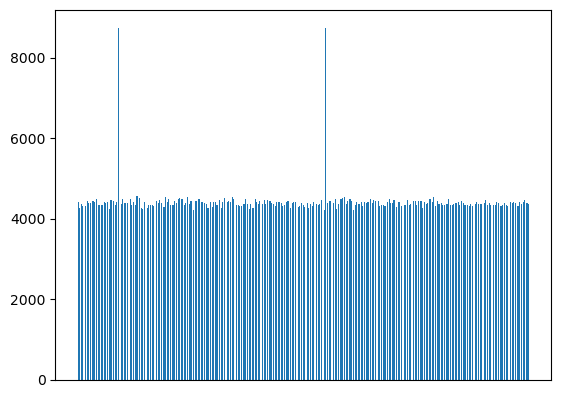

In [346]:
plt.hist(df['DISTRIBUTION_CHANNEL'], bins=400)
plt.xticks([])
plt.show()

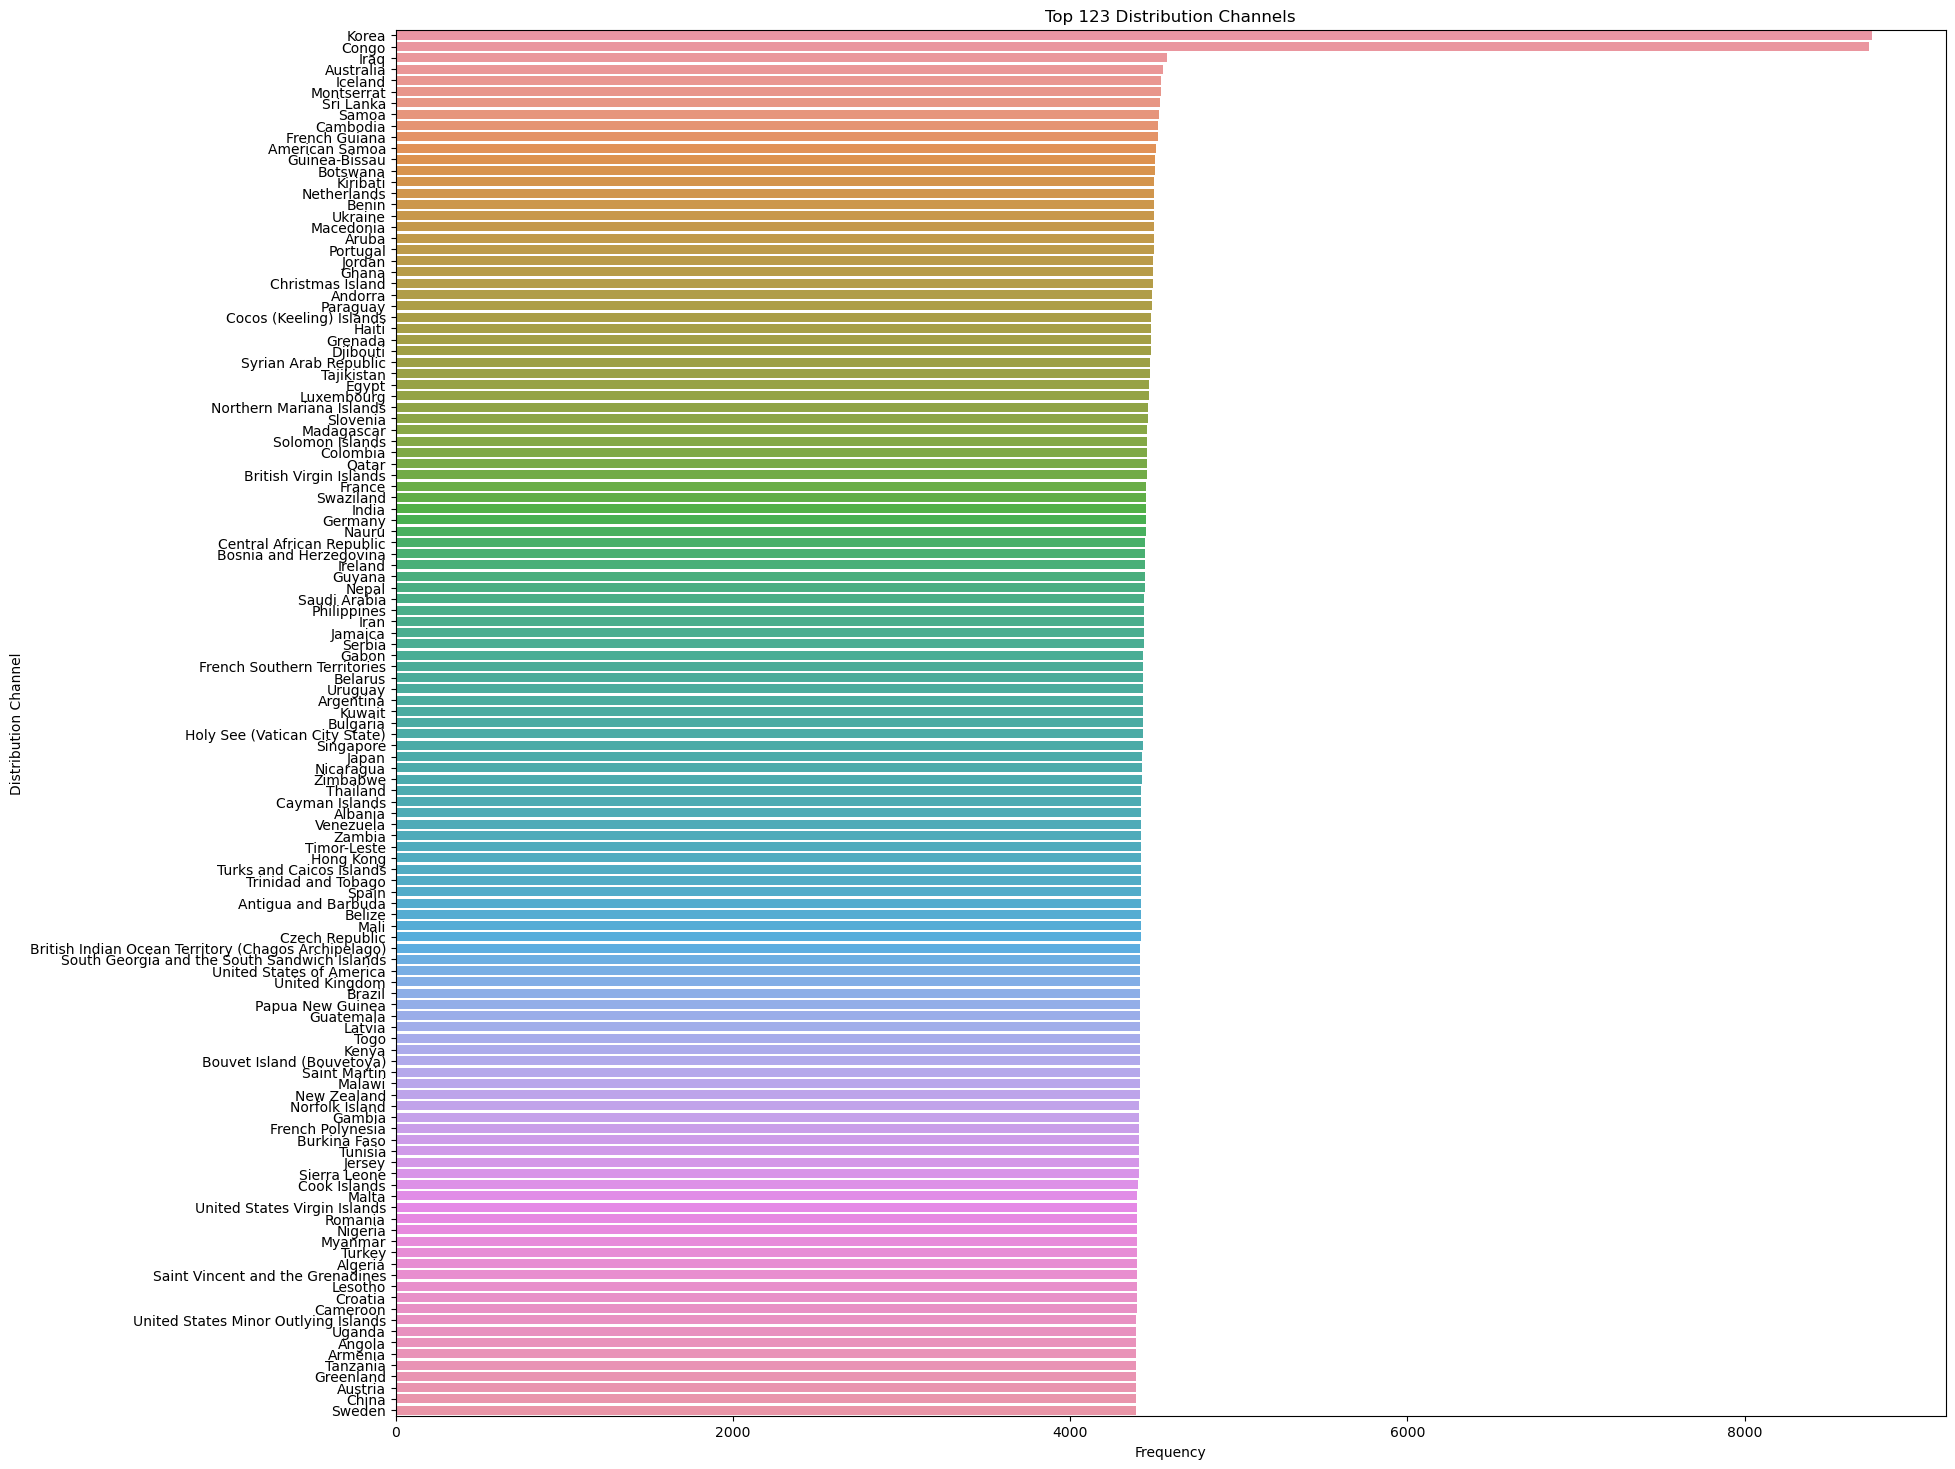

In [347]:
import statistics
Median = statistics.median(df['DISTRIBUTION_CHANNEL'].value_counts())
# Count the frequency of each value in the DISTRIBUTION_CHANNEL column
counts = df['DISTRIBUTION_CHANNEL'].value_counts()

# Filter out the values that occur less frequently than a certain threshold
threshold = Median
counts = counts[counts >= threshold]

# Plot a horizontal bar chart to show the top N values by frequency
plt.figure(figsize=(20, 18))
sns.barplot(x=counts.values, y=counts.index)
plt.xlabel('Frequency')
plt.ylabel('Distribution Channel')
plt.title(f'Top {len(counts)} Distribution Channels')
plt.show()



### Q2 Create a Pie Chart on ORDER_CURRENC

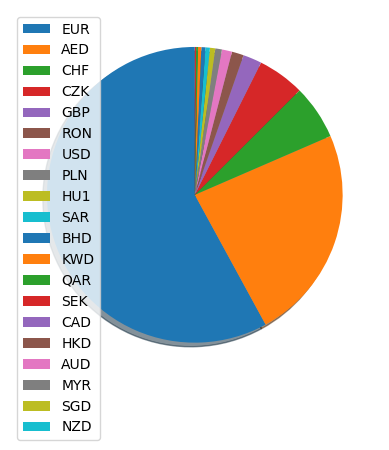

In [348]:
plt.pie(df['ORDER_CURRENCY'].value_counts(), shadow=True, startangle=90)
plt.legend(df['ORDER_CURRENCY'].unique(), loc='upper left')
plt.show()

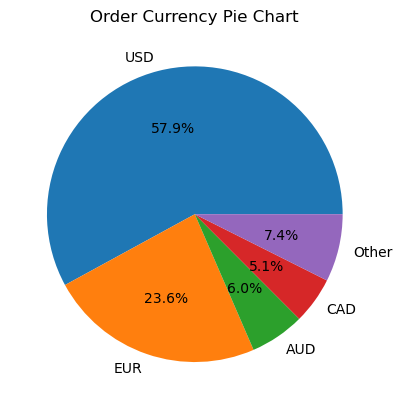

In [349]:
# Get value counts for ORDER_CURRENCY column
currency_count = df['ORDER_CURRENCY'].value_counts()

# Group values that appear less than 5% of the time into "Other" category
threshold = 0.05
small_values = currency_count[currency_count < threshold * currency_count.sum()]
currency_count['Other'] = small_values.sum()
currency_count.drop(index=small_values.index, inplace=True)

# Create pie chart
plt.pie(currency_count.values, labels=currency_count.index, autopct='%1.1f%%')
plt.title('Order Currency Pie Chart')

# Display chart
plt.show()

### Q3 Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

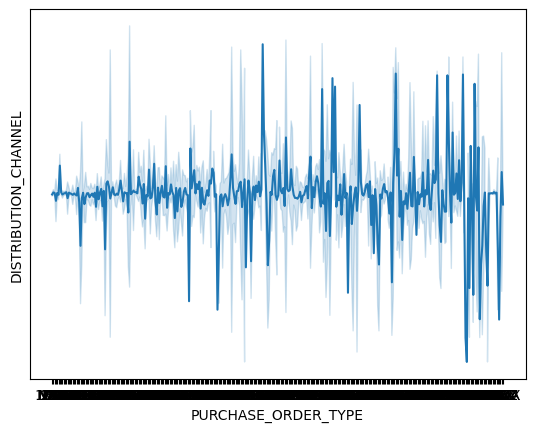

In [350]:
sns.lineplot(x=df['PURCHASE_ORDER_TYPE'], y=df['DISTRIBUTION_CHANNEL'], data=df)
plt.yticks([])
plt.show()

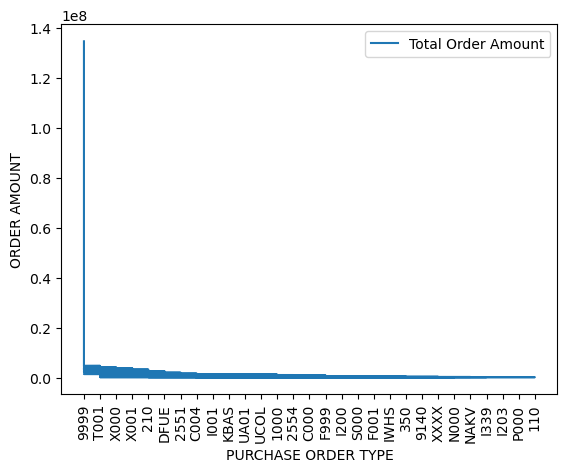

In [351]:
# Group by PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL, and calculate total ORDER_AMOUNT
grouped_data = df.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL'])['ORDER_AMOUNT'].sum()

# Sort the data in descending order of ORDER_AMOUNT and select top 5 values
top_data = grouped_data.sort_values(ascending=False)[:1500]

# Reset the index
top_data = top_data.reset_index()

# Create a line chart
plt.plot(top_data['PURCHASE_ORDER_TYPE'], top_data['ORDER_AMOUNT'], label='Total Order Amount')
plt.xticks(rotation=90)
plt.xlabel('PURCHASE ORDER TYPE')
plt.ylabel('ORDER AMOUNT')
plt.legend()
plt.show()

<Axes: xlabel='DISTRIBUTION_CHANNEL', ylabel='PURCHASE_ORDER_TYPE'>

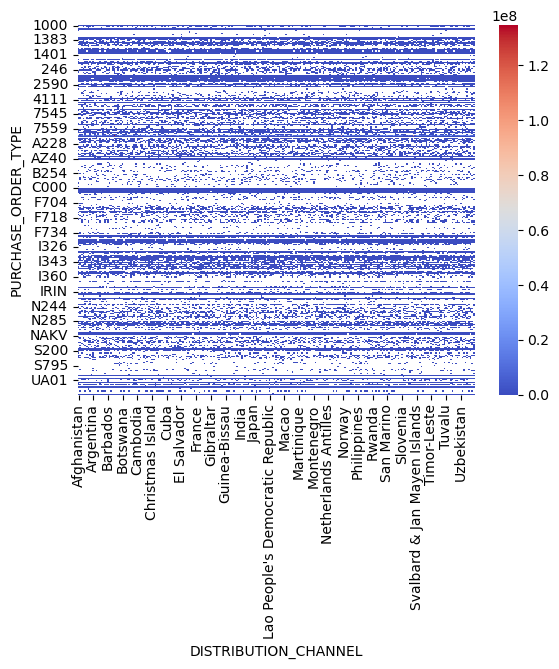

In [352]:
# Aggregate the data by grouping it by PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
grouped_df = df.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL']).agg({'ORDER_AMOUNT': 'sum'})

# Reset the index to turn the grouped columns into regular columns
grouped_df = grouped_df.reset_index()

# Pivot the table to make PURCHASE_ORDER_TYPE the x-axis, DISTRIBUTION_CHANNEL the y-axis, and ORDER_AMOUNT the color
pivot_df = grouped_df.pivot(index='PURCHASE_ORDER_TYPE', columns='DISTRIBUTION_CHANNEL', values='ORDER_AMOUNT')

# Plot the resulting heatmap
sns.heatmap(pivot_df, cmap='coolwarm')

To analyze the distribution of purchase orders based on order amount, we follow these steps:

- We begin by sorting the data in descending order based on the 'AMOUNT_IN_USD' column.

- Next, we determine the top 20 values for both 'PURCHASE_ORDER_TYPE' and 'DISTRIBUTION_CHANNEL'. This selection is based on the frequency of occurrence for each value.

- We then filter the sorted data to include only the rows where 'PURCHASE_ORDER_TYPE' and 'DISTRIBUTION_CHANNEL' belong to the top 20 values.

- After filtering, we group the data by 'PURCHASE_ORDER_TYPE' and 'DISTRIBUTION_CHANNEL', and calculate the sum of the 'AMOUNT_IN_USD' column for each group.

- Finally, we create a line plot to visualize the total order amount for each combination of purchase order type and distribution channel.

- By following these steps, we can effectively examine the distribution of purchase orders based on their order amount across different types and channels.

What can we infer from this line plot?
- We can infer how the total order amount varies across different distribution channels for each purchase order type
- By looking at the individual lines for each purchase order type, we can see which distribution channels generate the most revenue and which generate the least.
- Overall, this analysis can help businesses identify which purchase order types and distribution channels are most profitable and adjust their strategies accordingly

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16484\1942791089.py:16: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in grouped_df.groupby(['PURCHASE_ORDER_TYPE']):


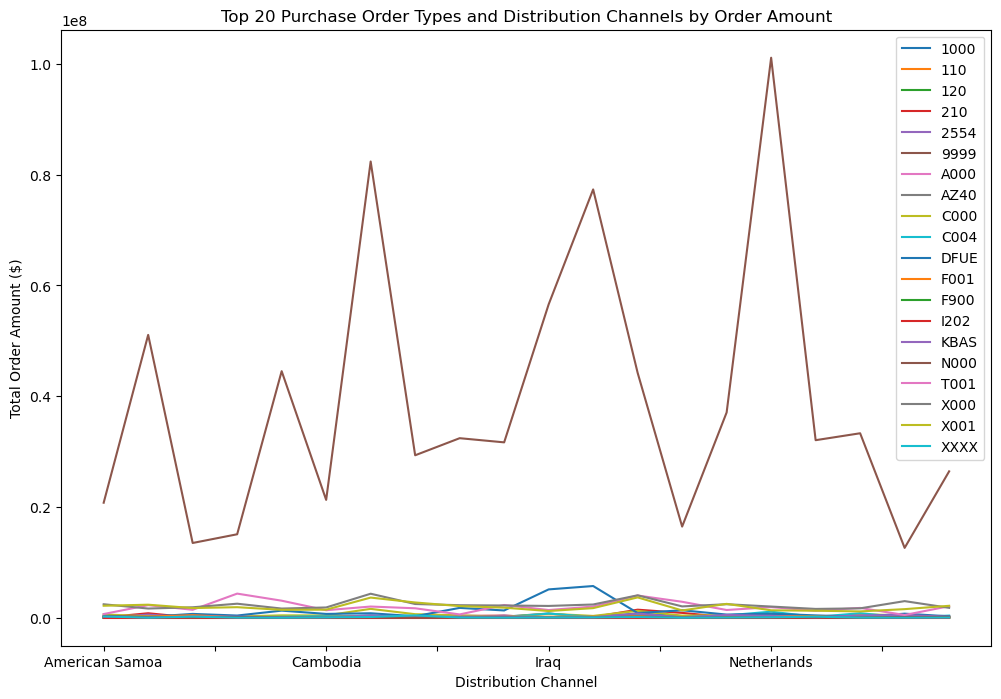

In [353]:
df_sorted = df.sort_values(by='AMOUNT_IN_USD', ascending=False)

# Get the top 20 values for PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
top_purchase_orders = df_sorted['PURCHASE_ORDER_TYPE'].value_counts().head(20).index.tolist()
top_dist_channels = df_sorted['DISTRIBUTION_CHANNEL'].value_counts().head(20).index.tolist()

# Filter the dataframe to include only the top 20 PURCHASE_ORDER_TYPE values and top 20 DISTRIBUTION_CHANNEL values
df_filtered = df_sorted[(df_sorted['PURCHASE_ORDER_TYPE'].isin(top_purchase_orders)) & (df_sorted['DISTRIBUTION_CHANNEL'].isin(top_dist_channels))]

# Group the filtered dataframe by PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL, and get the total ORDER_AMOUNT for each group
grouped_df = df_filtered.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL'])['AMOUNT_IN_USD'].sum().reset_index()

# Create a line plot of ORDER_AMOUNT for each PURCHASE_ORDER_TYPE-DISTRIBUTION_CHANNEL combination
fig, ax = plt.subplots(figsize=(12,8))

for key, grp in grouped_df.groupby(['PURCHASE_ORDER_TYPE']):
    ax = grp.plot(ax=ax, kind='line', x='DISTRIBUTION_CHANNEL', y='AMOUNT_IN_USD', label=key)

plt.title('Top 20 Purchase Order Types and Distribution Channels by Order Amount')
plt.ylabel('Total Order Amount ($)')
plt.xlabel('Distribution Channel')
plt.legend(loc='best')

plt.show()

To analyze the distribution of purchase orders based on their order amount, we follow these steps:

- Initially, we sort the data in descending order by the 'AMOUNT_IN_USD' column to prioritize higher order amounts.

- Next, we determine the top 20 values for both 'PURCHASE_ORDER_TYPE' and 'DISTRIBUTION_CHANNEL' based on their frequency of occurrence within the dataset.

- Subsequently, we filter the data to include only the rows where 'PURCHASE_ORDER_TYPE' belongs to the top 20 values and 'DISTRIBUTION_CHANNEL' is among the top 20 values.

- Following the filtering process, we create a cross-tabulation or contingency table that showcases the relationship between 'PURCHASE_ORDER_TYPE' and 'DISTRIBUTION_CHANNEL' using the filtered data. This allows us to observe how the two variables interact.

- Finally, we visualize the cross-tabulation using a stacked bar chart. The chart represents each combination of 'PURCHASE_ORDER_TYPE' and 'DISTRIBUTION_CHANNEL' as a separate stack within the bar, providing a visual representation of the distribution of purchase orders across different types and channels.

By executing these steps, we can effectively analyze and present the distribution of purchase orders based on their order amount, taking into account the specific types and channels involved.

WHY do we need this ?
- From this analysis, we can infer the most popular types of purchase orders and distribution channels for high-value orders. We can see which combinations are more frequent and get an idea of what types of purchase orders are likely to be associated with which distribution channels

WHY a STACKED BAR PLOT?
- It provides a clear view of the relative proportions of each distribution channel for each purchase order type and highlights any patterns or trends that may exist in the data.
-  A stacked bar chart is appropriate for displaying the distribution of two categorical variables when we want to show the contribution of each category to the whole. 


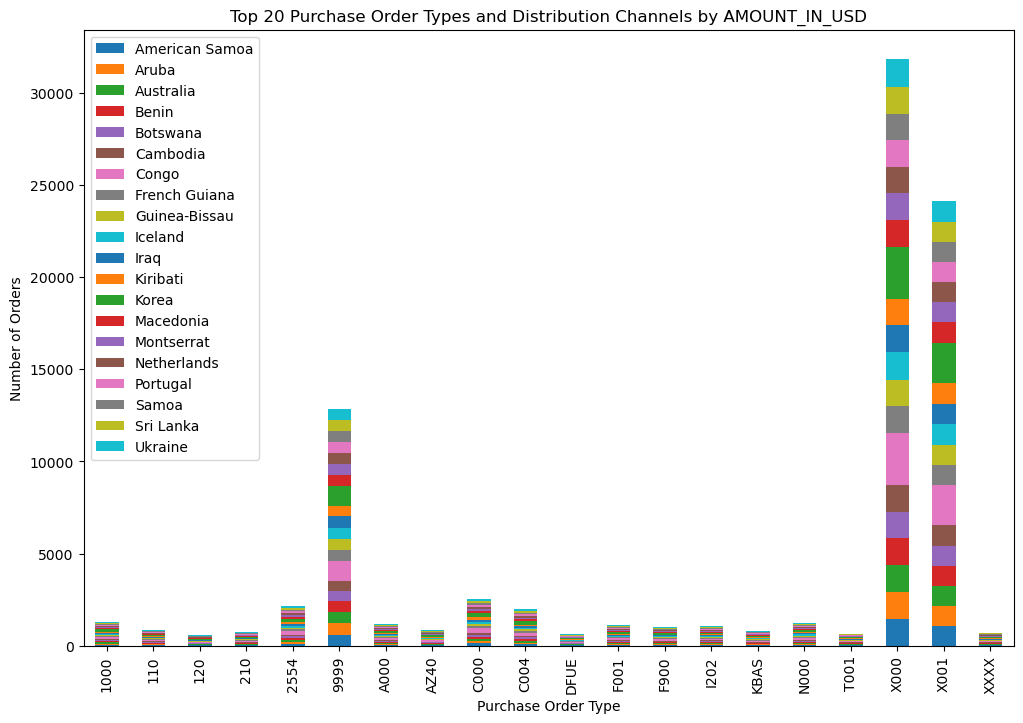

In [354]:
# Sorting the data based on AMOUNT_IN_USD 
df_sorted = df.sort_values(by='AMOUNT_IN_USD', ascending=False)

# Get the top 20 values for PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
top_purchase_orders = df_sorted['PURCHASE_ORDER_TYPE'].value_counts().head(20).index.tolist()
top_dist_channels = df_sorted['DISTRIBUTION_CHANNEL'].value_counts().head(20).index.tolist()

# Filter the dataframe to include only the top 20 PURCHASE_ORDER_TYPE values and top 20 DISTRIBUTION_CHANNEL values
df_filtered = df[(df['PURCHASE_ORDER_TYPE'].isin(top_purchase_orders)) & (df['DISTRIBUTION_CHANNEL'].isin(top_dist_channels))]

# Create a cross-tabulation of PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
ct = pd.crosstab(df_filtered['PURCHASE_ORDER_TYPE'], df_filtered['DISTRIBUTION_CHANNEL'])

# Create a stacked bar chart of the cross-tabulation
fig, ax = plt.subplots(figsize=(12,8))
ct.plot(kind='bar', stacked=True, ax=ax)

plt.title('Top 20 Purchase Order Types and Distribution Channels by AMOUNT_IN_USD')
plt.ylabel('Number of Orders')
plt.xlabel('Purchase Order Type')
plt.legend(loc='best')

plt.show()

WHY do we need this ?
- From this analysis, we can infer the most popular types of purchase orders and distribution channels for high-value orders. We can see which combinations are more frequent and get an idea of what types of purchase orders are likely to be associated with which distribution channels

WHY a STACKED BAR PLOT?
- It provides a clear view of the relative proportions of each distribution channel for each purchase order type and highlights any patterns or trends that may exist in the data.
-  A stacked bar chart is appropriate for displaying the distribution of two categorical variables when we want to show the contribution of each category to the whole. 

### Q4 Create a line plot on ORDER_CREATION_DATE and amount_in_usd

Line plot of the order creation date vs. the amount in USD for each order in the dataset
- Line plot: Depicts the correlation between order creation date and amount in USD.
- Offers a comprehensive view of the relationship between these two variables.
- Identifies trends and patterns in the data.


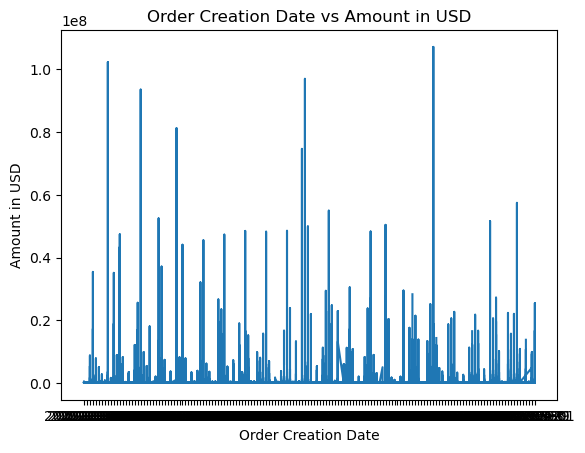

In [355]:
plt.plot(df['ORDER_CREATION_DATE'], df['AMOUNT_IN_USD'])
plt.title('Order Creation Date vs Amount in USD')
plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')
plt.show()

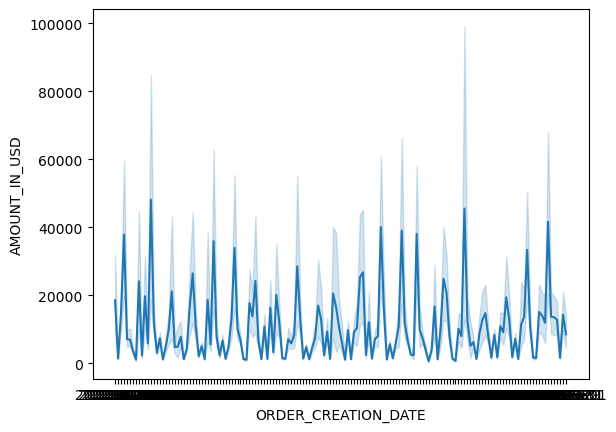

In [357]:
sns.lineplot(x=df['ORDER_CREATION_DATE'], y=df['AMOUNT_IN_USD'], data=df)
plt.show()

### Q5. Create a boxplot on ORDER_AMOUNT	to find out the outliers

A box plot is utilized to present the distribution of order amounts across the entire dataset, offering an overview of the typical range and identifying any potential outliers or skewness in the data.

- The purpose of the box plot is to provide a visual representation that depicts the central tendency, spread, and skewness of the order amount distribution. By examining the box plot, one can observe the interquartile range (IQR), which encompasses the middle 50% of the data. Additionally, the median line within the box denotes the central tendency of the distribution.

- In this particular dataset, the box plot reveals a significant number of outliers, indicating values that are unusually high or low compared to the rest of the data. The presence of these outliers contributes to the skewness of the box plot, indicating that the distribution of order amounts is not symmetrical.

- By analyzing the box plot, it becomes evident that there is variation in the order amounts, with some values deviating significantly from the majority. This insight helps to identify potential anomalies or patterns in the dataset, enabling further investigation or analysis if necessary.


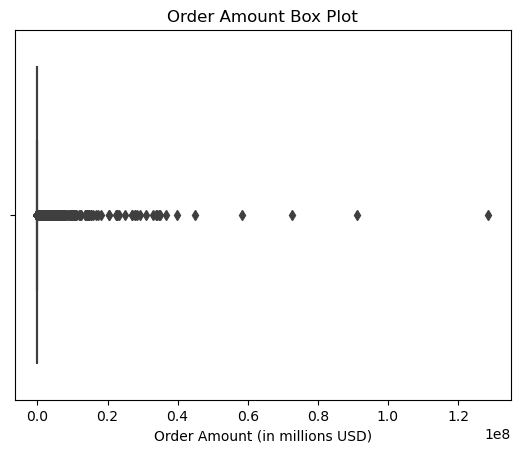

In [358]:
# Set y-axis limits to exclude outliers
plt.ylim(0, df['ORDER_AMOUNT'].quantile(0.95)) 

# Create a box plot using Seaborn
sns.boxplot(data=df, x='ORDER_AMOUNT')
plt.title('Order Amount Box Plot')
plt.xlabel('Order Amount (in millions USD)')
plt.show()


### Q6. Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT

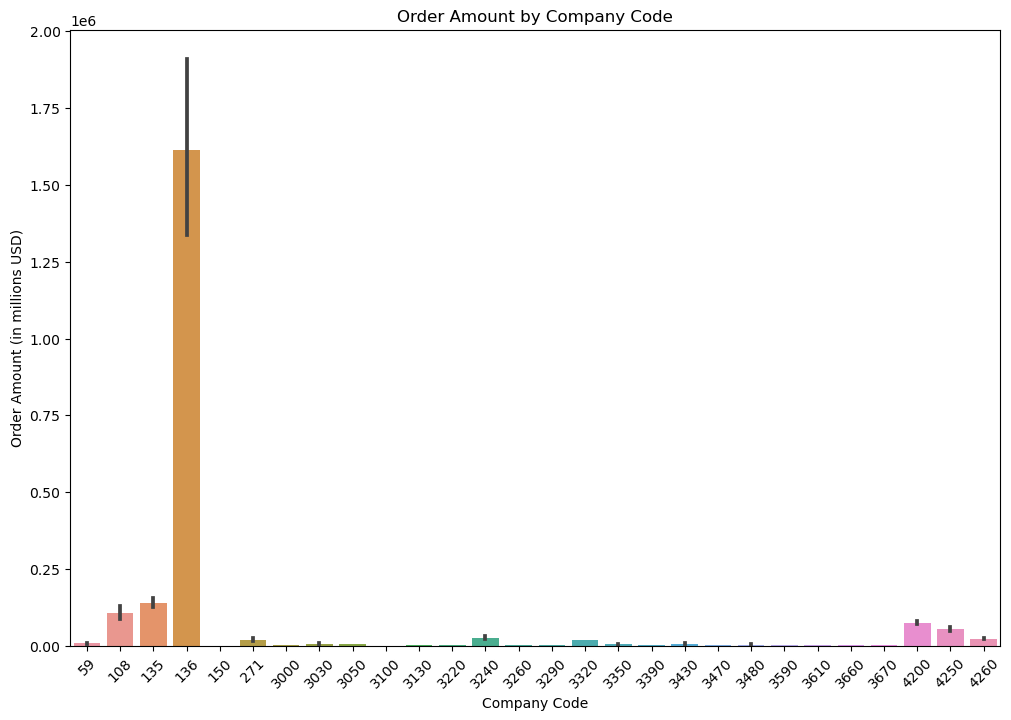

In [359]:
# Create a bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='COMPANY_CODE', y='ORDER_AMOUNT', data=df)
plt.xlabel('Company Code')
plt.ylabel('Order Amount (in millions USD)')
plt.title('Order Amount by Company Code')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


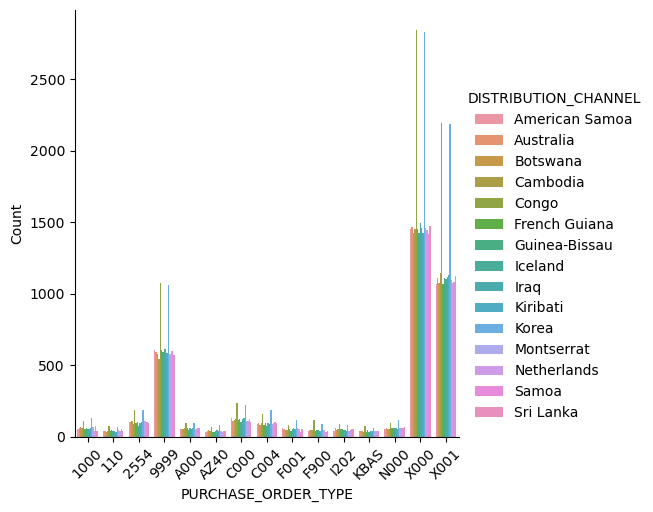

In [360]:
#Grouped bar chart that shows the distribution of purchase orders for each distribution channel

#sort the data according to AMOUNT_IN_USD
data_sorted = df.sort_values(by='AMOUNT_IN_USD', ascending=False)

# Get the top 15 values for PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
top_purchase_orders = data_sorted['PURCHASE_ORDER_TYPE'].value_counts().head(15).index.tolist()
top_distribution_channels = data_sorted['DISTRIBUTION_CHANNEL'].value_counts().head(15).index.tolist()

# Create a filtered dataframe for the top purchase orders and distribution channels
filtered_data = df[df['PURCHASE_ORDER_TYPE'].isin(top_purchase_orders) & 
                     df['DISTRIBUTION_CHANNEL'].isin(top_distribution_channels)]

# Group the data by purchase order type and distribution channel
grouped_data = filtered_data.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL']).size().reset_index(name='Count')

# Plot the grouped bar chart
sns.catplot(x='PURCHASE_ORDER_TYPE', y='Count', hue='DISTRIBUTION_CHANNEL', kind='bar', data=grouped_data)
plt.xticks(rotation =45)
plt.show()

## Milestone 3 - Feature Engineering and Selection

In [361]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

### Q1. REPLACING OUTLIERS FROM THE COLOUMN AMOUNT_IN_USD WITH THE MEDIAN

In [362]:
# Calculate the median of the "AMOUNT_IN_USD" column
amount_median = df['AMOUNT_IN_USD'].median()

# Calculate the IQR of the "AMOUNT_IN_USD" column
q1 = df['AMOUNT_IN_USD'].quantile(0.25)
q3 = df['AMOUNT_IN_USD'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with the mode value
df['AMOUNT_IN_USD'] = df['AMOUNT_IN_USD'].apply(lambda x: amount_median if x < lower_bound or x > upper_bound else x)

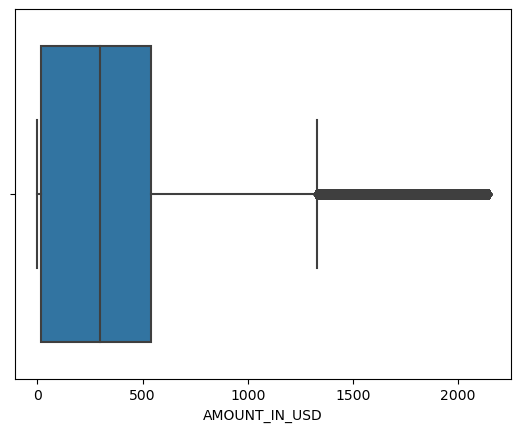

In [363]:
sns.boxplot(x=df['AMOUNT_IN_USD'])
median = df['AMOUNT_IN_USD'].median()
df['AMOUNT_IN_USD'] = df['AMOUNT_IN_USD'].mask(df['AMOUNT_IN_USD'] > 2000000, median)

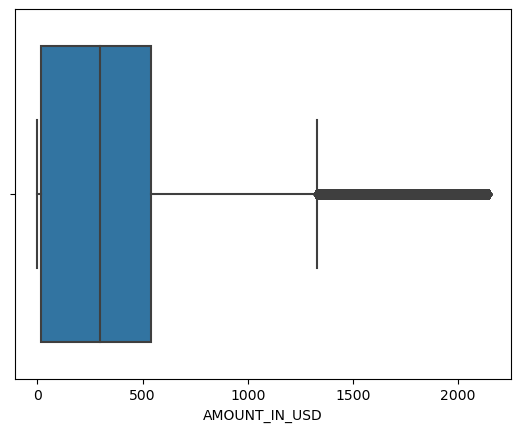

In [364]:
sns.boxplot(x=df['AMOUNT_IN_USD'])
plt.show()

### Q2. Label encoding or One hot Encoding on all the categorical columns

In [365]:
categorical = []
continuous = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    elif df[col].dtype != 'datetime64[ns]':  # Exclude Timestamp columns
        continuous.append(col)

le = LabelEncoder()

for col in categorical:
    df[col] = le.fit_transform(df[col])

### Q3. Log Transformations on continuous columns

In [366]:
for col in continuous:
    df[col] = df[col].apply(lambda x: np.log(x))

### Q4. Try to extract new features by grouping existing columns

In [367]:
grouped_df = df.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'AMOUNT_IN_USD': ['max']
}).reset_index()
grouped_df.columns = ['SALES_ORG', 'AVG_ORDER_AMOUNT', 'TOTAL_CREDIT_VALUE', 'UNIQUE_CUSTOMERS', 'MAX_AMOUNT_USD']

grouped_df

,SALES_ORG,AVG_ORDER_AMOUNT,TOTAL_CREDIT_VALUE,UNIQUE_CUSTOMERS,MAX_AMOUNT_USD
0,7.649693,NaN,609429,141,7.657382
1,7.650169,NaN,723167,129,7.641881
2,7.650645,NaN,594668,116,7.667196
3,7.651120,NaN,667986,124,7.660020
4,7.651596,NaN,806552,137,7.660800
...,...,...,...,...,...
2406,8.413165,NaN,613023,143,7.595443
2407,8.413387,NaN,620833,122,7.647887
2408,8.413609,NaN,775251,139,7.643962
2409,8.413831,NaN,487248,146,7.646583


In [368]:
df['AMOUNT_TO_CREDIT_RATIO'] = df['AMOUNT_IN_USD'] / df['RELEASED_CREDIT_VALUE']

FEATURES USING DATE TIME MANIPULATION

In [374]:
# # Change the format of ORDER_CREATION_DATE to datetime[64] with format "%Y%m%d"
# df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y%m%d')

# # Change the format of REQUESTED_DELIVERY_DATE to datetime[64] with format "%Y%m%d"
# df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')

In [373]:
# df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'])
# df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'])

# df['DAYS_LEFT'] = (df['REQUESTED_DELIVERY_DATE'] - df['ORDER_CREATION_DATE']).dt.days
# df['TIME_LEFT'] = df['REQUESTED_DELIVERY_DATE'] - df['ORDER_CREATION_DATE']


### Q5. Create a heatmap to find correlation between the columns

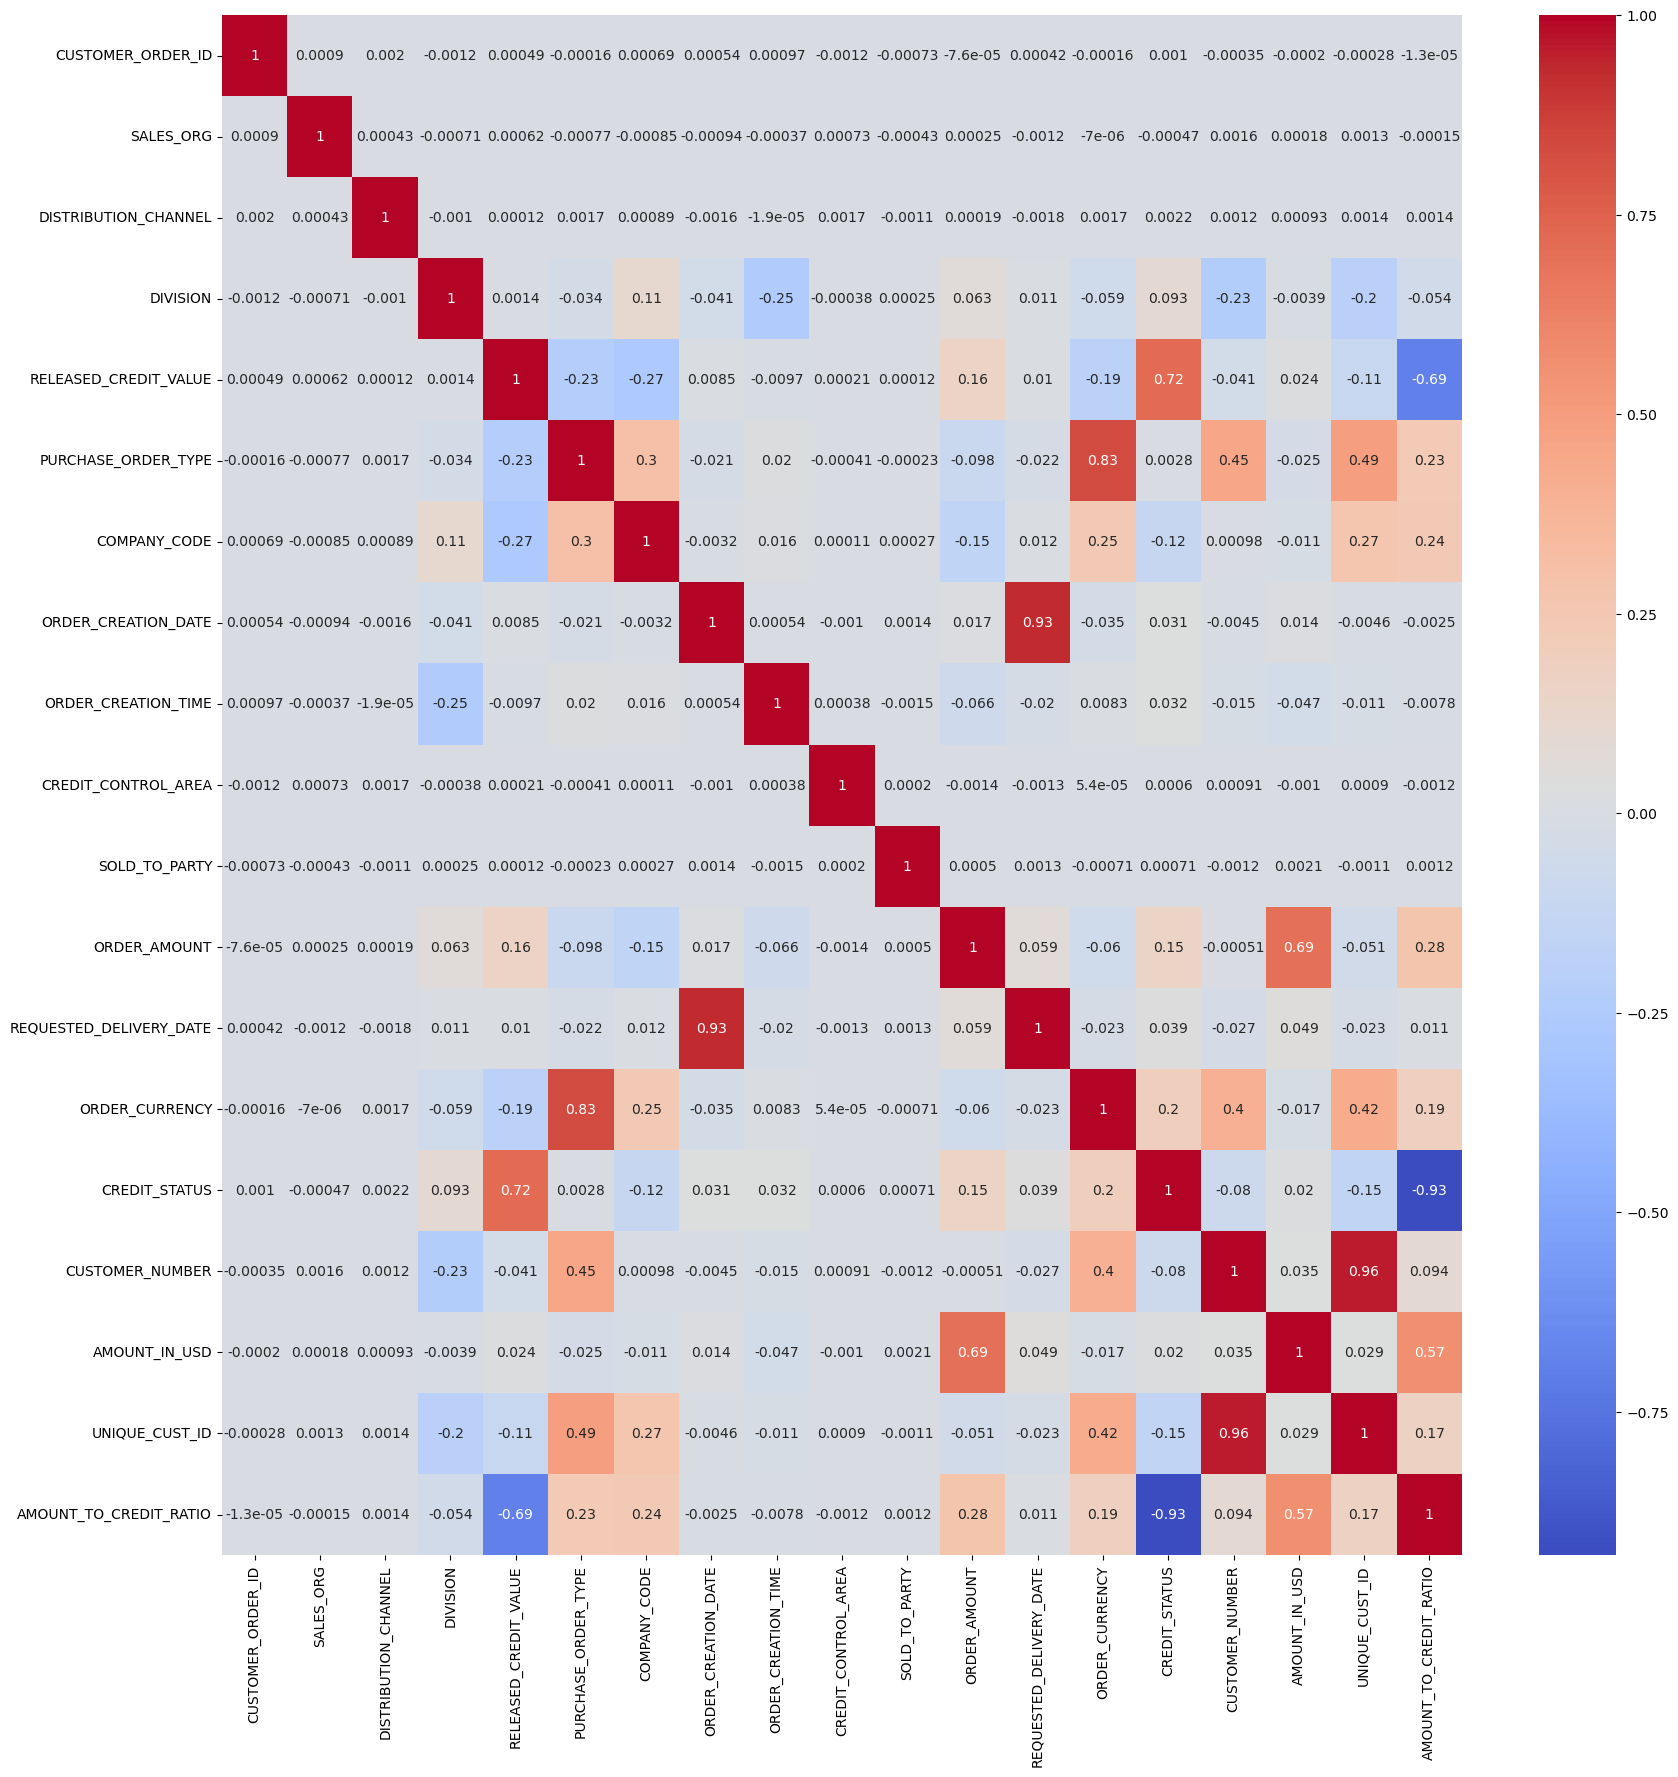

In [372]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Q6. Try to identify important or relevant columns for feature extraction

In [375]:
corr_matrix = df.corr().abs()
high_corr_var = np.where(corr_matrix > 0.7)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(high_corr_var)

[('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'), ('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('ORDER_CREATION_DATE', 'REQUESTED_DELIVERY_DATE'), ('CREDIT_STATUS', 'AMOUNT_TO_CREDIT_RATIO'), ('CUSTOMER_NUMBER', 'UNIQUE_CUST_ID')]


In [376]:
df.columns

Index(['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', 'DIVISION',
       'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'COMPANY_CODE',
       'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'CREDIT_CONTROL_AREA',
       'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'REQUESTED_DELIVERY_DATE',
       'ORDER_CURRENCY', 'CREDIT_STATUS', 'CUSTOMER_NUMBER', 'AMOUNT_IN_USD',
       'UNIQUE_CUST_ID', 'AMOUNT_TO_CREDIT_RATIO'],
      dtype='object')

In [270]:
# df.to_csv('FinalNew.csv', index = 'False')

# Milestone 4

### Q1. Modify the dataset to pass into any type of machine learning models.

In [377]:
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV
import inspect

In [381]:
datasetTrain = "FinalNew.csv"
df = pd.read_csv(datasetTrain)
df.head()

,Unnamed: 0,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
0,0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,887.310950,123118073220
1,1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,731.851907,123118073220
2,2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,62735.238563,121187583260
3,3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1306.450836,12104997703290
4,4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000,12103514003290


In [382]:
df.columns

Index(['Unnamed: 0', 'CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL',
       'DIVISION', 'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE',
       'COMPANY_CODE', 'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME',
       'CREDIT_CONTROL_AREA', 'SOLD_TO_PARTY', 'ORDER_AMOUNT',
       'REQUESTED_DELIVERY_DATE', 'ORDER_CURRENCY', 'CREDIT_STATUS',
       'CUSTOMER_NUMBER', 'AMOUNT_IN_USD', 'UNIQUE_CUST_ID'],
      dtype='object')

In [383]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']


le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
scaler = StandardScaler()
for col in num_cols:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

In [384]:
df.columns

Index(['Unnamed: 0', 'CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL',
       'DIVISION', 'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE',
       'COMPANY_CODE', 'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME',
       'CREDIT_CONTROL_AREA', 'SOLD_TO_PARTY', 'ORDER_AMOUNT',
       'REQUESTED_DELIVERY_DATE', 'ORDER_CURRENCY', 'CREDIT_STATUS',
       'CUSTOMER_NUMBER', 'AMOUNT_IN_USD', 'UNIQUE_CUST_ID'],
      dtype='object')

In [385]:
df.rename(columns = {'AMOUNT_IN_USD': 'target'}, inplace = True)

In [386]:
df.dropna(inplace = True)

X = df.drop(columns = ['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 355)

### Q2. Try different machine learning models like -
 - Linear Regression
 - Support Vector Machine
 - Decision Tree
 - Random Forest
 - AdaBoost
 - Xgboost etc.

In [ ]:
!pip install xgboost

In [ ]:
# import inspect

# # Import the xgboost module
# import xgboost

# # Get the mapping of estimator modules
# estimator_module_mapping = inspect.getmembers(xgboost, inspect.isclass)

# # Extend the list of estimator modules with xgboost
# estimator_module_mapping += all_estimators(type_filter='regressor')

# regressor_models = []

# # Iterate through all estimator classes
# for name, RegressorClass in estimator_module_mapping:
#     try:
#         regressor = RegressorClass()
#         regressor_models.append((name, regressor))
#     except Exception as e:
#         pass

# # Print the names of all available regression models, including XGBoost
# for name, _ in regressor_models:
#     print(name)


In [387]:
regressor_models = []
for name, RegressorClass in all_estimators(type_filter='regressor'):
    try:
        regressor = RegressorClass()
        regressor_models.append((name, regressor))
    except Exception as e:
        continue

regressor_models.pop(33)
regressor_models.pop(46)
# regressor_models.pop(33)  #('LinearSVR', LinearSVR())

('SVR', SVR())

In [388]:
regressor_models

[('ARDRegression', ARDRegression()),
 ('AdaBoostRegressor', AdaBoostRegressor()),
 ('BaggingRegressor', BaggingRegressor()),
 ('BayesianRidge', BayesianRidge()),
 ('CCA', CCA()),
 ('DecisionTreeRegressor', DecisionTreeRegressor()),
 ('DummyRegressor', DummyRegressor()),
 ('ElasticNet', ElasticNet()),
 ('ElasticNetCV', ElasticNetCV()),
 ('ExtraTreeRegressor', ExtraTreeRegressor()),
 ('ExtraTreesRegressor', ExtraTreesRegressor()),
 ('GammaRegressor', GammaRegressor()),
 ('GaussianProcessRegressor', GaussianProcessRegressor()),
 ('GradientBoostingRegressor', GradientBoostingRegressor()),
 ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
 ('HuberRegressor', HuberRegressor()),
 ('IsotonicRegression', IsotonicRegression()),
 ('KNeighborsRegressor', KNeighborsRegressor()),
 ('KernelRidge', KernelRidge()),
 ('Lars', Lars()),
 ('LarsCV', LarsCV()),
 ('Lasso', Lasso()),
 ('LassoCV', LassoCV()),
 ('LassoLars', LassoLars()),
 ('LassoLarsCV', LassoLarsCV()),
 ('LassoLarsIC', Lass

In [102]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGBoost:")
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)
print("MAE:", xgb_mae)
print("R-Squared:", xgb_r2)

XGBoost:
MSE: 2614149395.0212564
RMSE: 51128.75311428254
MAE: 35844.63892632839
R-Squared: 0.495722652944817


### Q3. Perform Regression model evaluations like MSE, RMSE, R-Square etc.

In [417]:
df_comp = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])
bestModel = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])

In [420]:
def eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    result = {
        'Regressor': model.__class__.__name__,
        'Model': model,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }
    print(f"{model.__class__.__name__}\nTest R2: {r2}\n============================================")
    return result

In [421]:
# for model in regressor_models[:3]:
#     try:
#         ans = eval(model[1], X_train, y_train, X_test, y_test)
#         df_comp = pd.concat([df_comp, pd.DataFrame([[ans[1], ans[0], ans[2], ans[3], ans[4]]], columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])])
#     except Exception as e:
#         pass

In [422]:
for model in regressor_models[:30]:
    try:
        ans = eval(model[1], X_train, y_train, X_test, y_test)
        df_comp = pd.concat([df_comp, pd.DataFrame([[ans['Model'], ans['Regressor'], ans['MSE'], ans['RMSE'], ans['R2']]], columns=['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])])
    except Exception as e:
        print(f"Error occurred for {model[0]}: {str(e)}")


ARDRegression
Test R2: 0.4791220885300802
AdaBoostRegressor
Test R2: -0.5132257043031332
BaggingRegressor
Test R2: 0.9835410950880528
BayesianRidge
Test R2: 0.47912011122170584
Error occurred for CCA: `n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.
DecisionTreeRegressor
Test R2: 0.9942240689163793
DummyRegressor
Test R2: -1.899852072551056e-05
ElasticNet
Test R2: 0.0006478423976656877
ElasticNetCV
Test R2: 0.0006385900357216423
ExtraTreeRegressor
Test R2: 0.9798846787028345
ExtraTreesRegressor
Test R2: 0.9977277717073407
Error occurred for GammaRegressor: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
Error occurred for GaussianProcessRegressor: Unable to allocate 210. GiB for an array with shape (167960, 167960) and data type float64
GradientBoostingRegressor
Test R2: 0.9846711931108526
HistGradientBoostingRegressor
Test R2: 0.6820450972062718


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor
Test R2: -0.002503964655059754
Error occurred for IsotonicRegression: Isotonic regression input X should be a 1d array or 2d array with 1 feature
KNeighborsRegressor
Test R2: -0.09136851508362853
Error occurred for KernelRidge: Unable to allocate 210. GiB for an array with shape (167960, 167960) and data type float64
Lars
Test R2: 0.45011707712963045
LarsCV
Test R2: 0.4720478470582764
Lasso
Test R2: 0.0006246945582564223
LassoCV
Test R2: 0.0006385974864626665
LassoLars
Test R2: 0.000624694557896821
LassoLarsCV
Test R2: 0.4791100530405963
LassoLarsIC
Test R2: 0.4790822178520613
LinearRegression
Test R2: 0.4791258364306623


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR
Test R2: 0.4501467109185048
MLPRegressor
Test R2: -10.609867309718226
Error occurred for MultiTaskElasticNet: For mono-task outputs, use ElasticNet


In [423]:
df_comp

,Regressor,Model,MSE,RMSE,R2
0,ARDRegression(),ARDRegression,2.846882,1.687271,0.479122
0,"(DecisionTreeRegressor(max_depth=3, random_sta...",AdaBoostRegressor,8.270605,2.875866,-0.513226
0,(DecisionTreeRegressor(random_state=1858686469...,BaggingRegressor,0.089957,0.299928,0.983541
0,BayesianRidge(),BayesianRidge,2.846893,1.687274,0.479120
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.031569,0.177676,0.994224
0,DummyRegressor(),DummyRegressor,5.465650,2.337873,-0.000019
0,ElasticNet(),ElasticNet,5.462006,2.337093,0.000648
0,ElasticNetCV(),ElasticNetCV,5.462056,2.337104,0.000639
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.109941,0.331574,0.979885
0,"(ExtraTreeRegressor(random_state=411055550), E...",ExtraTreesRegressor,0.012419,0.111440,0.997728


- An empty DataFrame named df_comp is created with columns 'Regressor', 'Model', 'MSE', 'RMSE', and 'R2'.
- The code iterates through the first 30 regression models in the regressor_models list.
- For each model, it calls the eval function with the corresponding model, training data (X_train and y_train), and test data (X_test and y_test).
- If the evaluation is successful, the results are stored in the ans dictionary.
- A new DataFrame is created using pd.DataFrame with the evaluation results as values and the columns named 'Regressor', 'Model', 'MSE', 'RMSE', and 'R2'.
- The new DataFrame is concatenated with the df_comp DataFrame using pd.concat, appending the evaluation results.
- If an exception occurs during the evaluation, an error message is printed.
- The df_comp DataFrame is sorted in ascending order based on the 'MSE' column using df_comp.sort_values.
- The top 5 rows with the lowest 'MSE' values are selected using .head(5).
- The selected rows are appended to the bestModel DataFrame.
- Finally, the first few rows of df_comp are printed using the head() method.

In [425]:
df_comp = df_comp.sort_values(by = ['MSE'], ascending = True)
bestModel = pd.concat([bestModel, df_comp.sort_values(by = ['MSE'], ascending = True).head(5)])
df_comp.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=411055550), E...",ExtraTreesRegressor,0.012419,0.111440,0.997728
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.031569,0.177676,0.994224
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.083780,0.289448,0.984671
0,(DecisionTreeRegressor(random_state=1858686469...,BaggingRegressor,0.089957,0.299928,0.983541
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.109941,0.331574,0.979885


In [426]:
regressor_models

[('ARDRegression', ARDRegression()),
 ('AdaBoostRegressor', AdaBoostRegressor()),
 ('BaggingRegressor', BaggingRegressor()),
 ('BayesianRidge', BayesianRidge()),
 ('CCA', CCA()),
 ('DecisionTreeRegressor', DecisionTreeRegressor()),
 ('DummyRegressor', DummyRegressor()),
 ('ElasticNet', ElasticNet()),
 ('ElasticNetCV', ElasticNetCV()),
 ('ExtraTreeRegressor', ExtraTreeRegressor()),
 ('ExtraTreesRegressor', ExtraTreesRegressor()),
 ('GammaRegressor', GammaRegressor()),
 ('GaussianProcessRegressor', GaussianProcessRegressor()),
 ('GradientBoostingRegressor', GradientBoostingRegressor()),
 ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
 ('HuberRegressor', HuberRegressor()),
 ('IsotonicRegression', IsotonicRegression()),
 ('KNeighborsRegressor', KNeighborsRegressor()),
 ('KernelRidge', KernelRidge()),
 ('Lars', Lars()),
 ('LarsCV', LarsCV()),
 ('Lasso', Lasso()),
 ('LassoCV', LassoCV()),
 ('LassoLars', LassoLars()),
 ('LassoLarsCV', LassoLarsCV()),
 ('LassoLarsIC', Lass

### Q4. Compare the accuracies of all the models

In [428]:
df_comp = df_comp.sort_values(by = ['MSE'], ascending = True)
bestModel = pd.concat([bestModel, df_comp.sort_values(by = ['MSE'], ascending = True).head(5)])
df_comp.head()
# print(bestModel.head())


,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=411055550), E...",ExtraTreesRegressor,0.012419,0.111440,0.997728
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.031569,0.177676,0.994224
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.083780,0.289448,0.984671
0,(DecisionTreeRegressor(random_state=1858686469...,BaggingRegressor,0.089957,0.299928,0.983541
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.109941,0.331574,0.979885


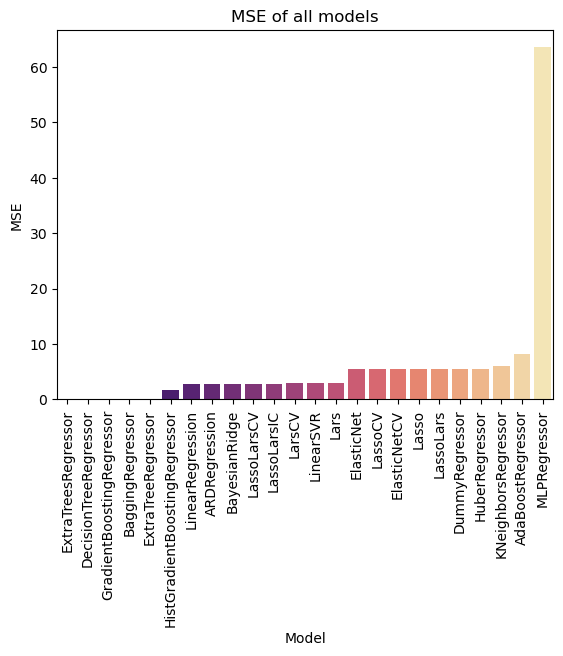

In [429]:
# df_comp['Model'] = df_comp['Model'].astype(str)
sns.barplot(x = 'Model', y = 'MSE', data = df_comp, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of all models')
plt.show()

In [430]:
df_comp = df_comp.sort_values(by = ['RMSE'], ascending = True)
bestModel = pd.concat([bestModel, df_comp.sort_values(by = ['MSE'], ascending = True).head(5)])
df_comp.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=411055550), E...",ExtraTreesRegressor,0.012419,0.111440,0.997728
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.031569,0.177676,0.994224
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.083780,0.289448,0.984671
0,(DecisionTreeRegressor(random_state=1858686469...,BaggingRegressor,0.089957,0.299928,0.983541
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.109941,0.331574,0.979885


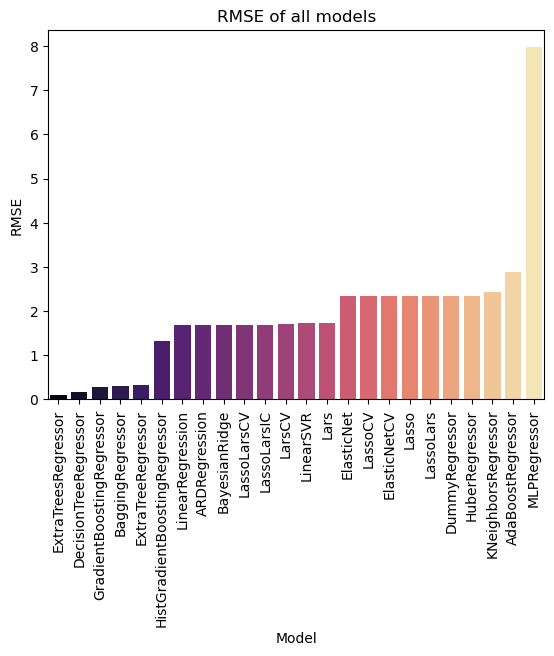

In [431]:
sns.barplot(x = 'Model', y = 'RMSE', data =  df_comp, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of all models')
plt.show()

In [433]:
df_comp = df_comp[df_comp['R2'] > 0]
df_comp = df_comp.sort_values(by = ['R2'], ascending = False)
bestModel = pd.concat([bestModel, df_comp.sort_values(by = ['MSE'], ascending = True).head(5)])
df_comp.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=411055550), E...",ExtraTreesRegressor,0.012419,0.111440,0.997728
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.031569,0.177676,0.994224
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.083780,0.289448,0.984671
0,(DecisionTreeRegressor(random_state=1858686469...,BaggingRegressor,0.089957,0.299928,0.983541
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.109941,0.331574,0.979885


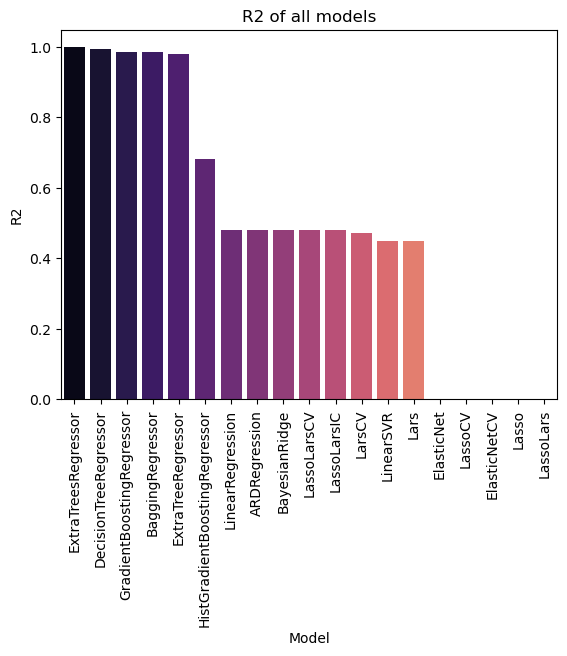

In [434]:
sns.barplot(x = 'Model', y = 'R2', data = df_comp, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of all models')
plt.show()

### Q5. Select the best possible model

In [436]:
bestModel1 = bestModel.copy()

In [437]:
bestModel = bestModel.drop_duplicates()
bestModel

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=411055550), E...",ExtraTreesRegressor,0.012419,0.111440,0.997728
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.031569,0.177676,0.994224
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,0.083780,0.289448,0.984671
0,(DecisionTreeRegressor(random_state=1858686469...,BaggingRegressor,0.089957,0.299928,0.983541
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.109941,0.331574,0.979885


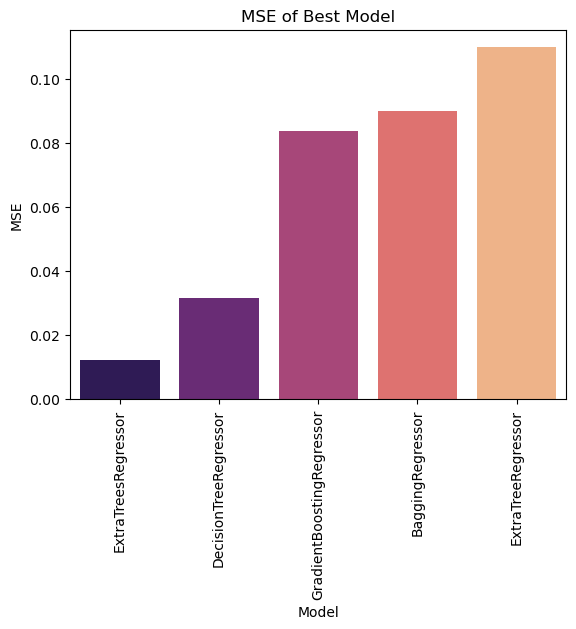

In [438]:
sns.barplot(x = 'Model', y = 'MSE', data = bestModel, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of Best Model')
plt.show()

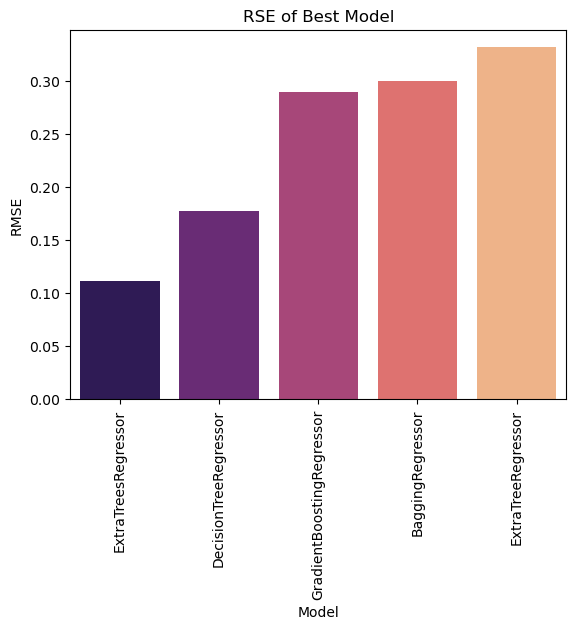

In [439]:
sns.barplot(x = 'Model', y = 'RMSE', data = bestModel, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RSE of Best Model')
plt.show()

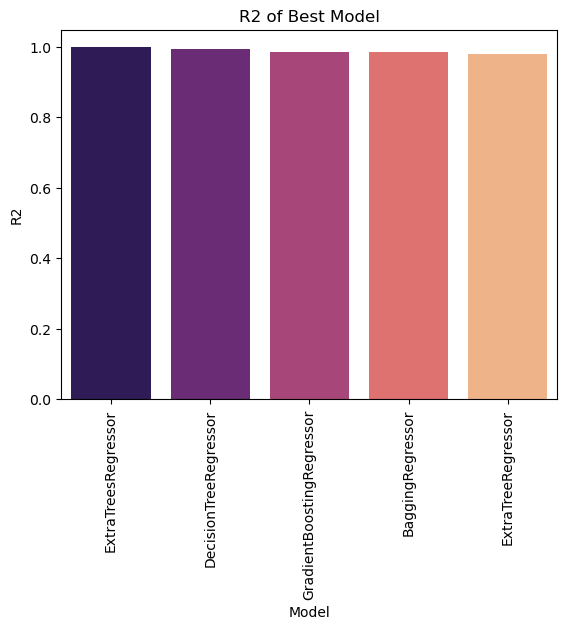

In [440]:
sns.barplot(x = 'Model', y = 'R2', data = bestModel, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of Best Model')
plt.show()

In [442]:
best_regressors = set()
for col in ['MSE', 'RMSE', 'R2']:
    # Sort the DataFrame by the current column and get the top 3 rows
    top = bestModel.sort_values(by=col, ascending=(col != 'R2')).head(3)
    # Add the names of the Regressor column from each row to the set
    best_regressors.update(top['Regressor'].values)

# Rename the set to reflect its contents
best_regressors = set(best_regressors)

In [444]:
best_regressors

{DecisionTreeRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor()}

In [450]:
# bestModel123 = set()

# bestModel = bestModel.sort_values(by = ['MSE'], ascending = True)

# for index, row in bestModel.head(3).iterrows():
#     bestModel123.add(row['Regressor'])

# bestModel = bestModel.sort_values(by = ['RMSE'], ascending = True)

# for index, row in bestModel.head(3).iterrows():
#     bestModel123.add(row['Regressor'])

# bestModel = bestModel.sort_values(by = ['R2'], ascending = False)

# for index, row in bestModel.head(3).iterrows():
#     bestModel123.add(row['Regressor'])

### Q6. Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms Come up with the best possible model accuracy.

In [453]:
def hyperparam(model, X_train, y_train, X_test, y_test):
    param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=5)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print('Best Parameters:', best_params)
    print('Best Score:', best_score)
    print('Best Estimator:', best_estimator)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2:', r2)
    
    return best_estimator, mse, rmse, r2


In [454]:
# def hyperparam(model, X_train, y_train, X_test, y_test):
#     grid_search = GridSearchCV(estimator = model, param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}, cv = 5, n_jobs = -1, verbose = 5)
#     grid_search.fit(X_train, y_train)
#     print(grid_search.best_params_)
#     print(grid_search.best_score_)
#     print(grid_search.best_estimator_)
#     y_pred = grid_search.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)
#     print('MSE: ', mse)
#     print('RMSE: ', rmse)
#     print('R2: ', r2)
#     return grid_search.best_estimator_, mse, rmse, r2

In [455]:
for model in best_regressors:
    try:
        print(model)
        hyperparam(model, X_train, y_train, X_test, y_test)            
    except:
        print('Error')

GradientBoostingRegressor()
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 700}
Best Score: 0.9691867631496338
Best Estimator: GradientBoostingRegressor(n_estimators=700)
MSE: 0.04637341770982974
RMSE: 0.21534488085355022
R2: 0.9915153190232204
DecisionTreeRegressor()
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Error
ExtraTreesRegressor()
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
23 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 473, in fit
    trees = Parallel(
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "C:\Users\KIIT\anaconda3\lib\site-pac

Best Parameters: {'n_estimators': 100}
Best Score: 0.9797163936560634
Best Estimator: ExtraTreesRegressor()
MSE: 0.013736968895876151
RMSE: 0.11720481600973635
R2: 0.9974866247858037


In [ ]:
# !pip install tensorflow

In [457]:
import importlib

try:
    importlib.import_module('tensorflow')
except ImportError:
    !pip install tensorflow

### Q7. Deep Learning Model for Regression

In [458]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Reshape
import tensorflow.keras.backend as K

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [475]:
def r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

In [477]:
import numpy as np
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

# Define the custom metric function
def r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

# Convert X_train and X_test to NumPy arrays
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()

# Reshape X_train and X_test to have 17 columns
X_train = X_train[:, :17]
X_test = X_test[:, :17]

# Verify the new shape of X_train and X_test
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# Rest of your code for model definition, compilation, and training
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=17))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse', r2])

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)


X_train shape: (167960, 17)
X_test shape: (41990, 17)
Epoch 1/10
4199/4199 [==============================] - 28s 5ms/step - loss: 590.8137 - mse: 590.8137 - r2: -521849.4375 - val_loss: 5.4142 - val_mse: 5.4142 - val_r2: -305.3622
Epoch 2/10
4199/4199 [==============================] - 22s 5ms/step - loss: 5.5189 - mse: 5.5189 - r2: -952.1310 - val_loss: 5.3411 - val_mse: 5.3411 - val_r2: -36.6241
Epoch 3/10
4199/4199 [==============================] - 23s 6ms/step - loss: 4.9423 - mse: 4.9423 - r2: -76.1592 - val_loss: 5.3428 - val_mse: 5.3428 - val_r2: -27.4528
Epoch 4/10
4199/4199 [==============================] - 22s 5ms/step - loss: 4.8960 - mse: 4.8960 - r2: -49.9825 - val_loss: 5.3429 - val_mse: 5.3429 - val_r2: -29.7531
Epoch 5/10
4199/4199 [==============================] - 26s 6ms/step - loss: 4.9048 - mse: 4.9048 - r2: -26.5462 - val_loss: 5.3432 - val_mse: 5.3432 - val_r2: -18.5870
Epoch 6/10
4199/4199 [==============================] - 25s 6ms/step - loss: 9.2835 - mse: 

In [480]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Reshape, LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

# Define custom R2 metric
def r2_keras(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    r2 = 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())
    return r2

lstm_model = Sequential()
lstm_model.add(Reshape((1, 17), input_shape=(17,)))
lstm_model.add(LSTM(128, activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(128, activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1, activation='linear'))

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mse', r2_keras])

lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm = y_pred_lstm.reshape(y_pred_lstm.shape[0], y_pred_lstm.shape[1])
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
print('MSE (LSTM):', mse_lstm)
print('RMSE (LSTM):', rmse_lstm)
print('R2 (LSTM):', r2_lstm)


Epoch 1/10
4199/4199 [==============================] - 63s 12ms/step - loss: 27.9713 - mse: 27.9713 - r2_keras: -27603.4844 - val_loss: 5.3386 - val_mse: 5.3386 - val_r2_keras: -26.5301
Epoch 2/10
4199/4199 [==============================] - 44s 10ms/step - loss: 5.3348 - mse: 5.3348 - r2_keras: -422.8690 - val_loss: 5.3369 - val_mse: 5.3369 - val_r2_keras: -28.1073
Epoch 3/10
4199/4199 [==============================] - 42s 10ms/step - loss: 9.4752 - mse: 9.4752 - r2_keras: -47449.8711 - val_loss: 5.3266 - val_mse: 5.3266 - val_r2_keras: -36.0141
Epoch 4/10
4199/4199 [==============================] - 46s 11ms/step - loss: 5.0599 - mse: 5.0599 - r2_keras: -526.7436 - val_loss: 5.3096 - val_mse: 5.3096 - val_r2_keras: -33.0559
Epoch 5/10
4199/4199 [==============================] - 43s 10ms/step - loss: 4.9019 - mse: 4.9019 - r2_keras: -84.3464 - val_loss: 5.3145 - val_mse: 5.3145 - val_r2_keras: -43.8312
Epoch 6/10
4199/4199 [==============================] - 43s 10ms/step - loss: 4.